In [ ]:
# Reading data
import pandas as pd
from google.colab import files
file = files.upload()

Saving train__dataset.csv to train__dataset.csv


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from scipy.stats import kruskal
from sklearn.model_selection import train_test_split

# Normalization
from sklearn.preprocessing import MinMaxScaler

# Sampling Technique
from imblearn.over_sampling import SMOTE
from collections import Counter

# Perfomance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# **Descriptive statistics**

In [ ]:
df = pd.read_csv("train__dataset.csv")

In [ ]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18132,1,0,0,2,0,0,0,103,2018,4,19,0,0,0,0,115.00,0,1
18133,2,0,0,3,0,0,0,129,2018,8,10,1,0,0,0,88.01,1,0
18134,2,0,0,1,0,0,0,90,2018,7,13,1,0,0,0,105.30,0,1
18135,2,0,0,3,0,0,0,18,2018,11,10,1,1,0,1,123.33,1,0


In [ ]:
df.shape

(18137, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000
mean,1.846777,0.107515,0.811104,2.208965,0.318465,0.031648,0.336770,85.377405,2017.820698,7.432762,15.660804,0.806197,0.025087,0.022440,0.151403,103.478868,0.617522,0.327618
std,0.516020,0.408901,0.873470,1.426365,0.629140,0.175066,0.772865,86.611736,0.383616,3.076999,8.772788,0.645972,0.156393,0.370078,1.714135,35.474103,0.787941,0.469357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.270000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [ ]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df.duplicated().sum()

4111

In [ ]:
display(df.astype('object').iloc[:, :8].describe().loc[['count', 'unique']])
display(df.astype('object').iloc[:, 8:].describe().loc[['count', 'unique']])

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time
count,18137,18137,18137,18137,18137,18137,18137,18137
unique,5,5,8,18,4,2,7,341


,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,18137,18137,18137,18137,18137,18137,18137,18137.0,18137,18137
unique,2,12,31,5,2,9,47,2722.0,6,2


# **Bar chart**

<Axes: xlabel='booking_status', ylabel='count'>

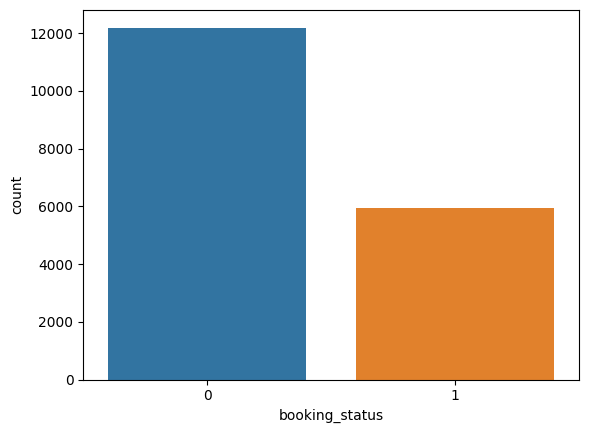

In [ ]:
sns.countplot(x = df["booking_status"])

In [ ]:
def create_stacked_countplot(target, input):
  colour = ['blue', 'red']
  df_repeated_guest = df.groupby([target, input]).size().reset_index().pivot(columns=  target, index= input, values=0)
  df_repeated_guest.plot(kind = 'bar', stacked = True, color = colour)

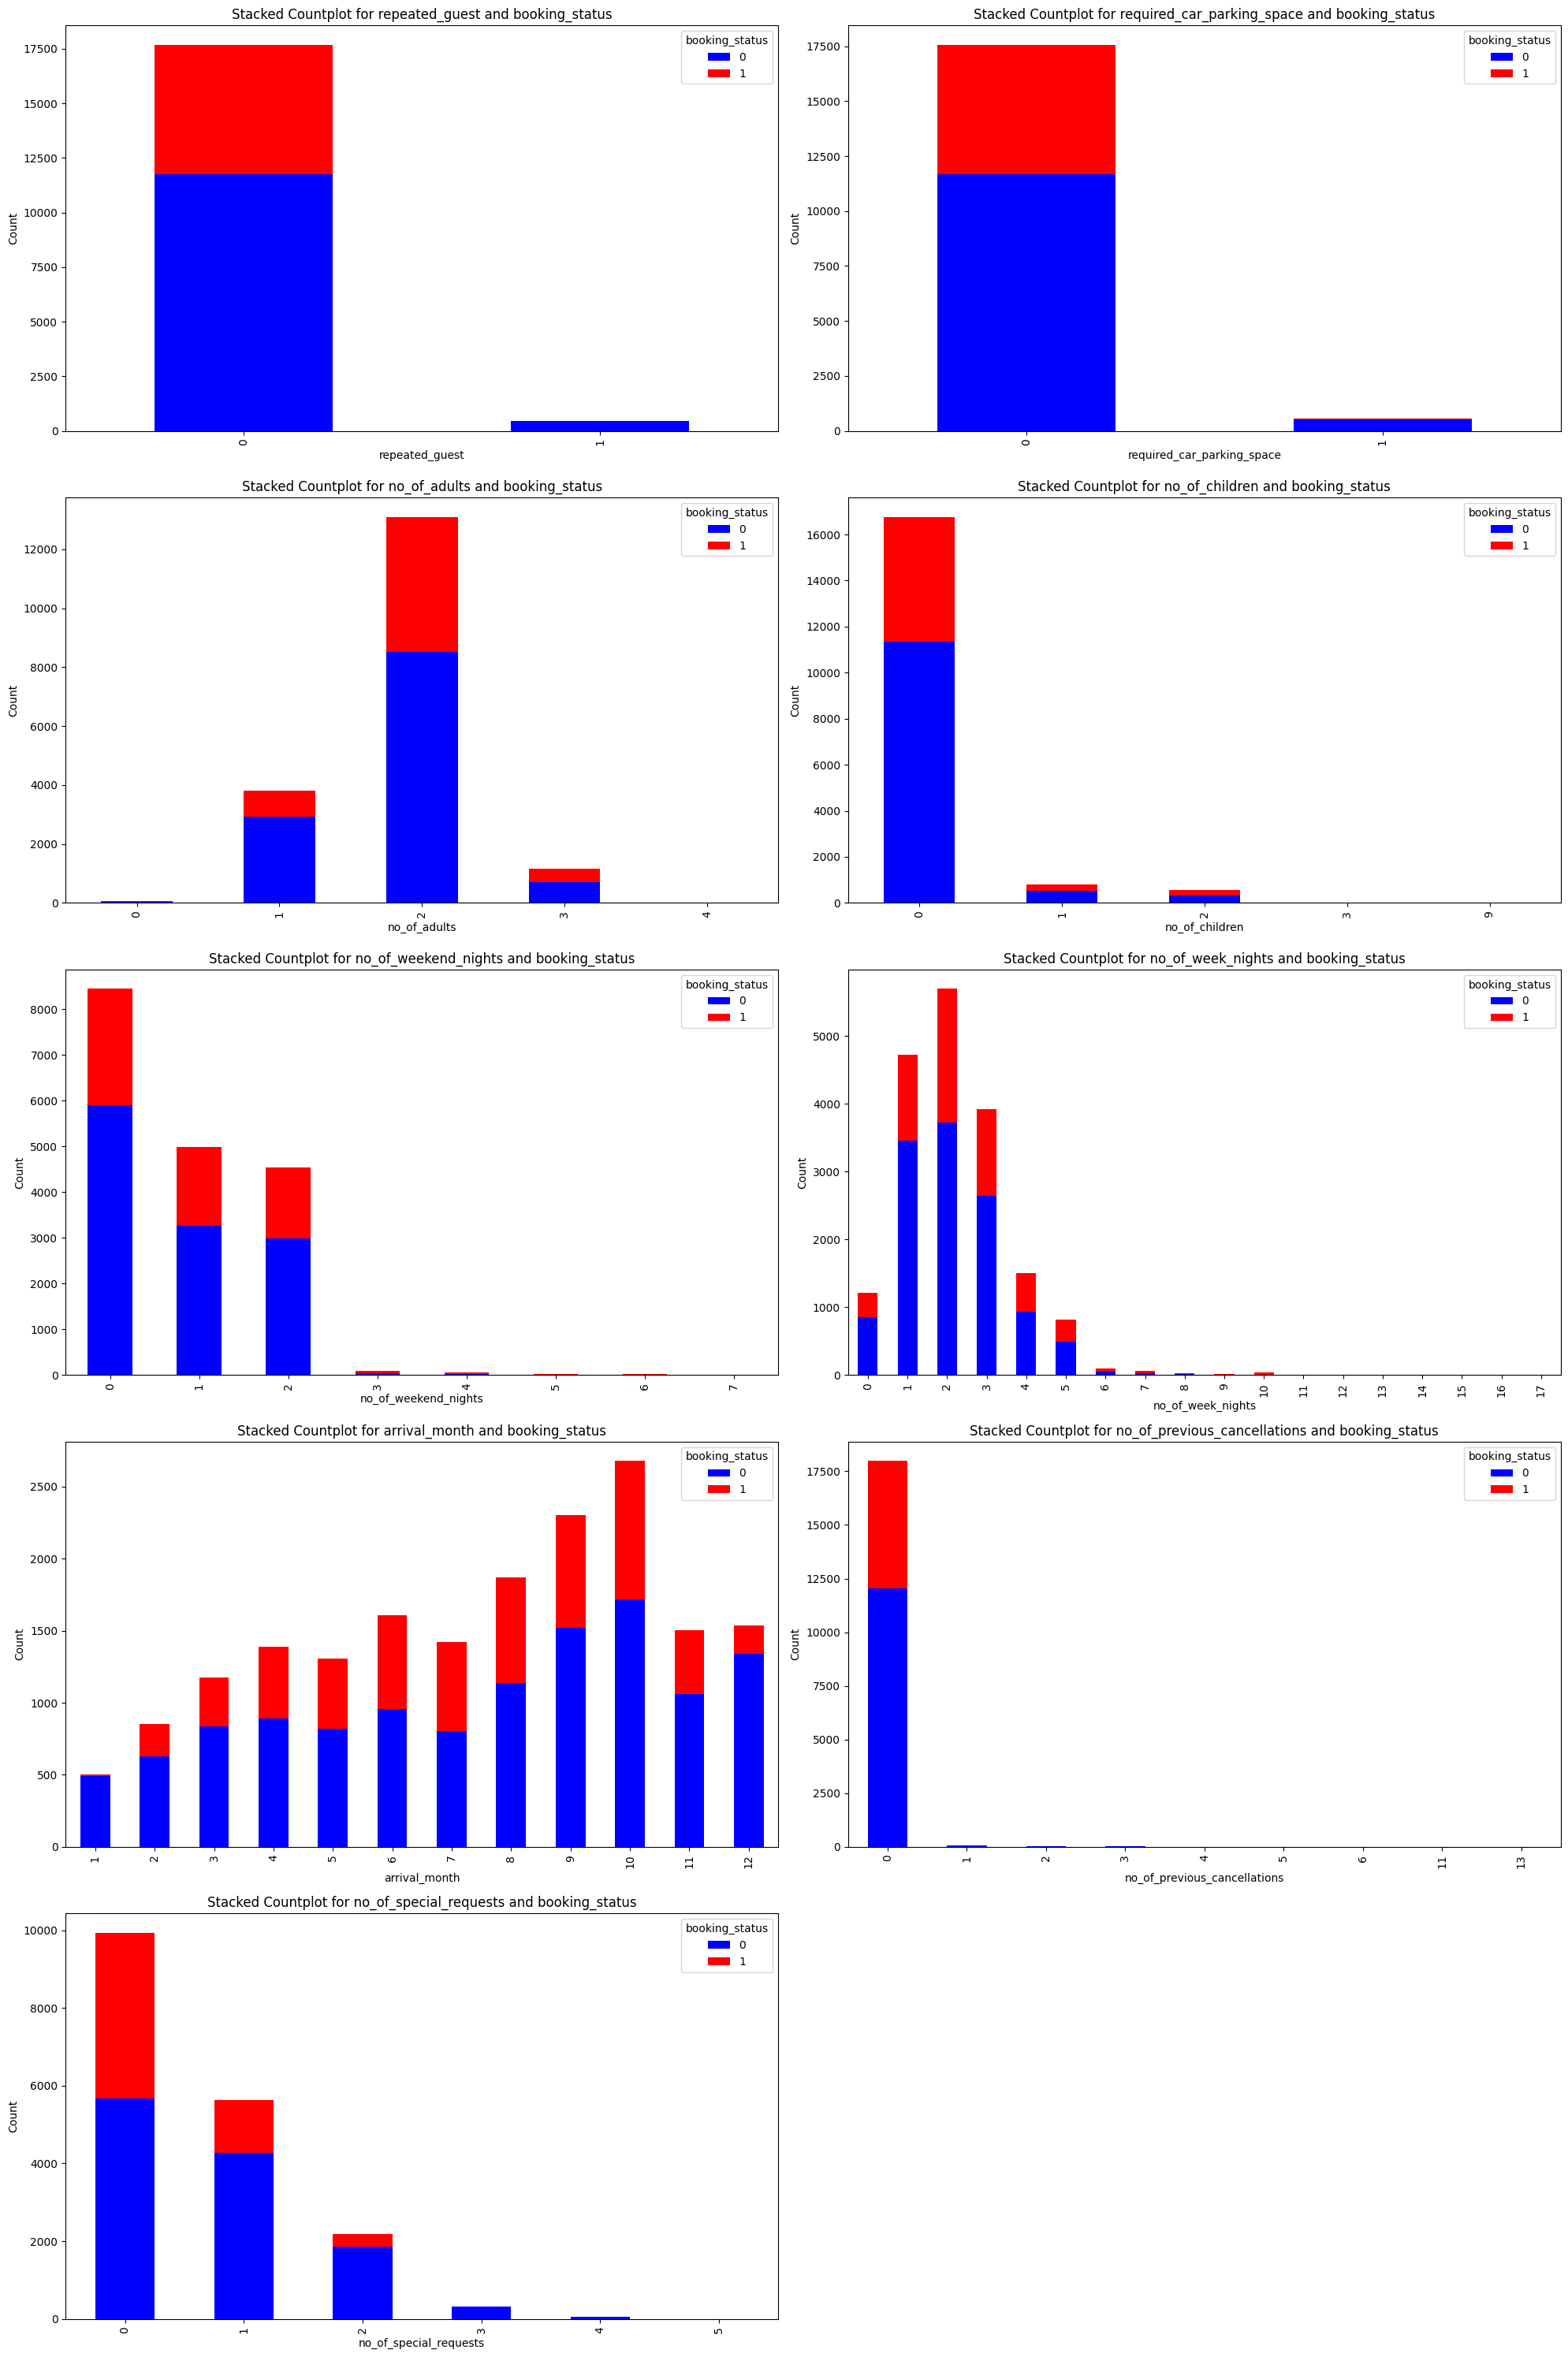

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_stacked_countplot(target, input_col, ax):
    colour = ['blue', 'red']
    df_repeated_guest = df.groupby([target, input_col]).size().reset_index().pivot(columns=target, index=input_col, values=0)
    df_repeated_guest.plot(kind='bar', stacked=True, color=colour, ax=ax)
    ax.set_xlabel(input_col)
    ax.set_ylabel('Count')
    ax.set_title(f'Stacked Countplot for {input_col} and {target}')

selected_columns = ['repeated_guest', 'required_car_parking_space', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'arrival_month', 'no_of_previous_cancellations', 'no_of_special_requests']

# Create subplots with 2 rows and 5 columns
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))

# Flatten the axs array to loop through the subplots
axs = axs.flatten()

for i, col in enumerate(selected_columns):
    create_stacked_countplot('booking_status', col, ax=axs[i])

# Hide any remaining empty subplots
for ax in axs[len(selected_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# **Histogram & Boxplot**

In [ ]:
def create_histogram(input, bins):
    plt.figure(figsize=(10, 10))
    sns.histplot(df[input], kde=True, bins=bins)
    plt.show()

def create_box_plot(target, input):
    plt.figure(figsize=(10, 10))
    sns.boxplot(x=target, y=input, data=df)
    plt.show()

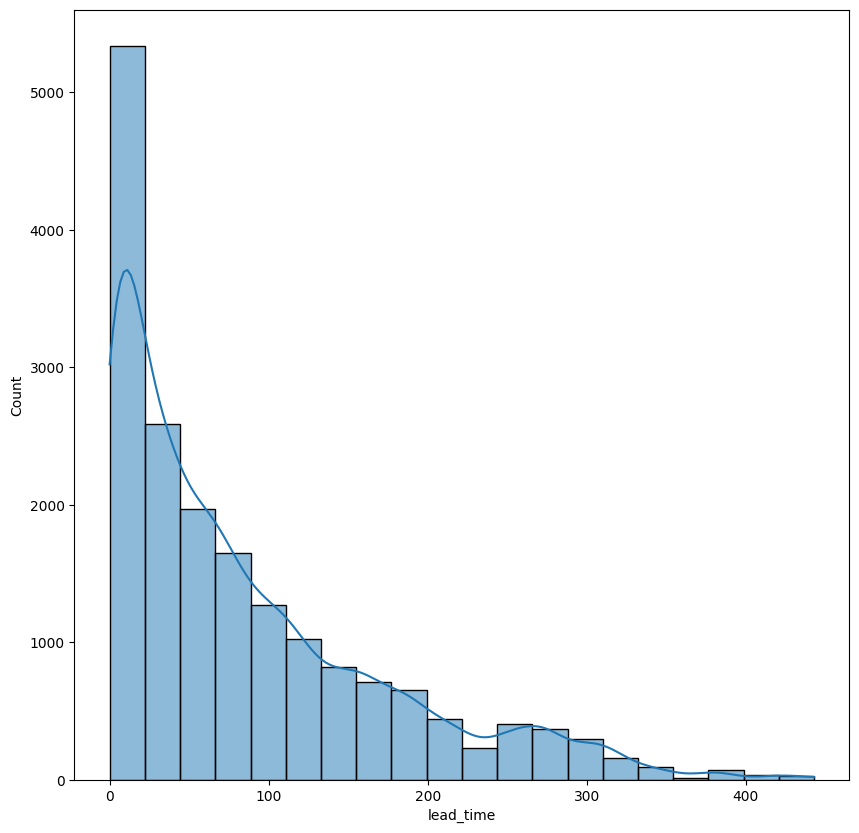

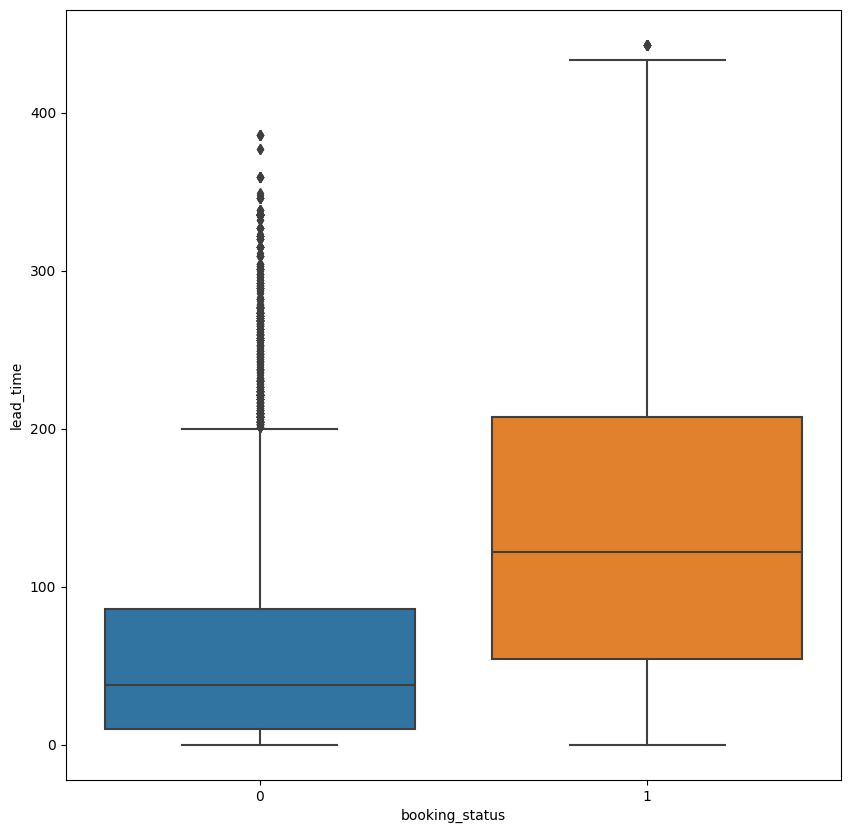

In [ ]:
#  lead time: days between the date of booking and the arrival date

create_histogram('lead_time', 20)
create_box_plot('booking_status', 'lead_time')

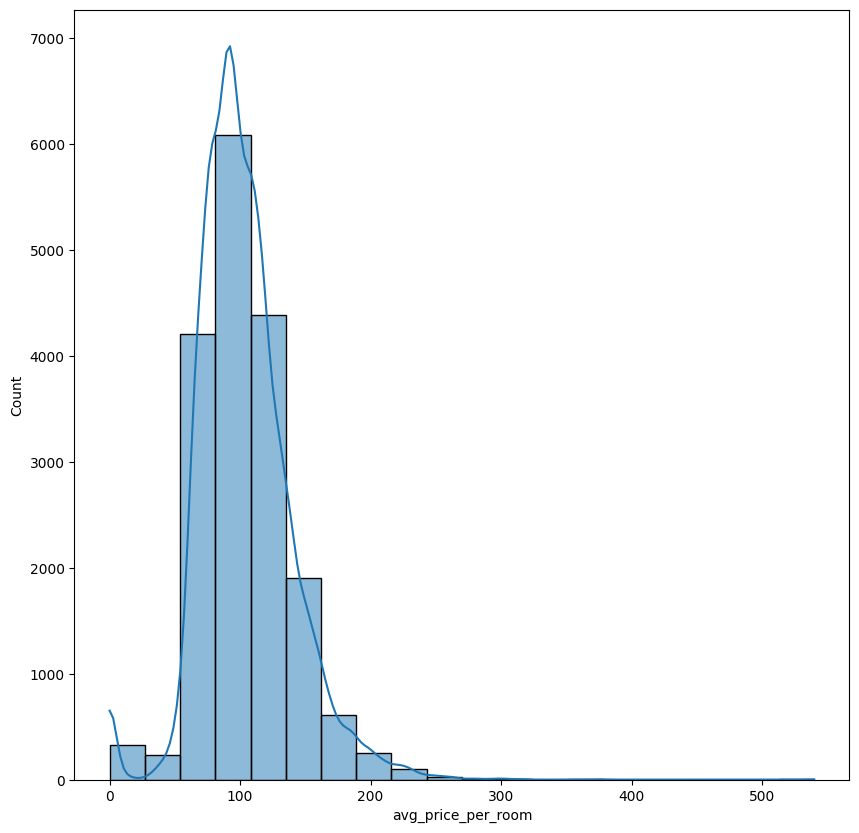

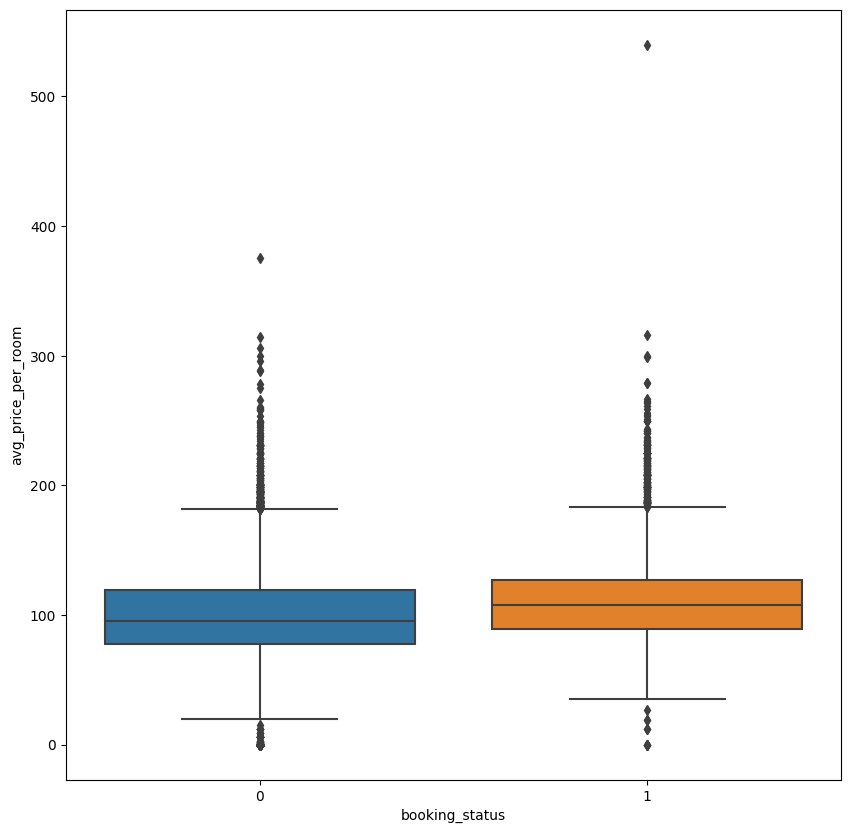

In [ ]:
#  average price per room

create_histogram('avg_price_per_room', 20)
create_box_plot('booking_status', 'avg_price_per_room')

# **Correlation graph to the target variable**

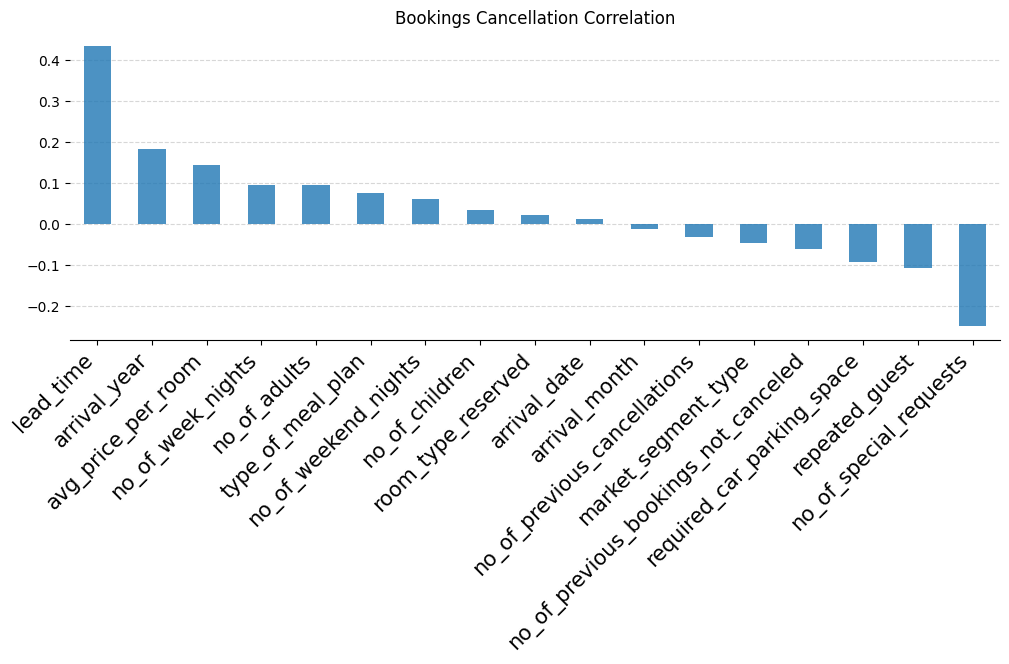

In [ ]:
(df.drop('booking_status', axis=1)
   .corrwith(df['booking_status'])
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Bookings Cancellation Correlation", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);

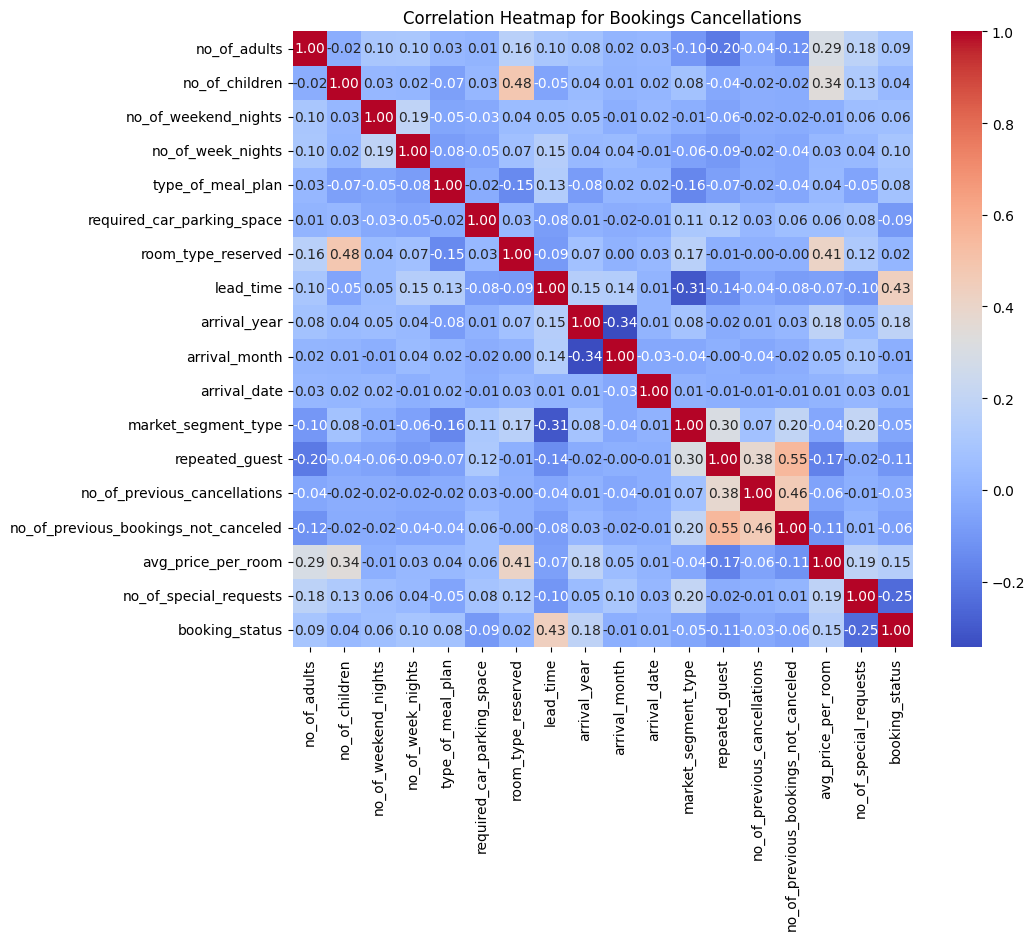

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap for Bookings Cancellations')
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.show()

# **Feature Importance**

## **Chi-square Test**

Consider to drop:
*   arrival year



In [ ]:
# chi-square test

two_values_columns = ['required_car_parking_space', 'arrival_year', 'repeated_guest']
two_values_input = df[two_values_columns]

chi2_test = SelectKBest(score_func=chi2, k='all')
chi2_test.fit(two_values_input, df['booking_status'])

SelectKBest(k='all', score_func=<function chi2 at 0x7b91d8e91b40>)

In [ ]:
# create dataframe for chi2 test scores
two_input_columns = two_values_input.columns[0:]

chi2_test_scores = pd.DataFrame(chi2_test.scores_, columns=['chi2_score'])
chi2_test_scores['column_name'] = two_input_columns
# swap column names and chi2 scores
chi2_test_scores = chi2_test_scores[['column_name', 'chi2_score']]
chi2_test_scores = chi2_test_scores.sort_values(by='chi2_score', ascending=False).reset_index(drop=True)

print("Chi2 Test Scores")
display(chi2_test_scores)

#  create dataframe for chi2 test p-values
chi2_test_p_values = pd.DataFrame(chi2_test.pvalues_, columns=['chi2_p_value'])
chi2_test_p_values['column_name'] = two_input_columns
# swap column names and chi2 scores
chi2_test_p_values = chi2_test_p_values[['column_name', 'chi2_p_value']]
chi2_test_p_values = chi2_test_p_values.sort_values(by='chi2_p_value', ascending=True).reset_index(drop=True)

print("Chi2 Test P-Values")
display(chi2_test_p_values)

Chi2 Test Scores


,column_name,chi2_score
0,repeated_guest,201.365631
1,required_car_parking_space,150.727691
2,arrival_year,0.044419


Chi2 Test P-Values


,column_name,chi2_p_value
0,repeated_guest,1.051539e-45
1,required_car_parking_space,1.202005e-34
2,arrival_year,8.330758e-01


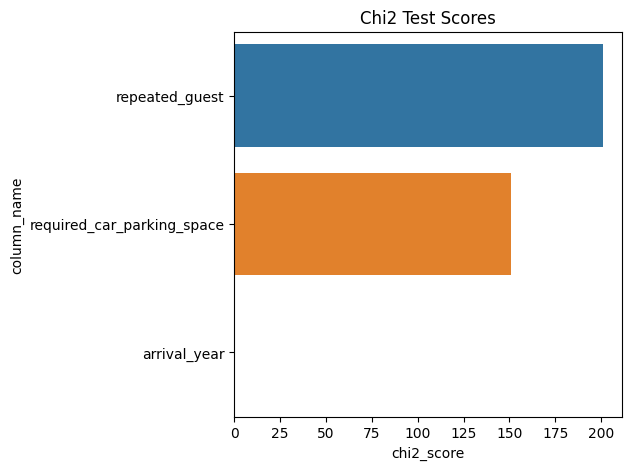

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='chi2_score', y='column_name', data=chi2_test_scores)
plt.title('Chi2 Test Scores')
plt.show()

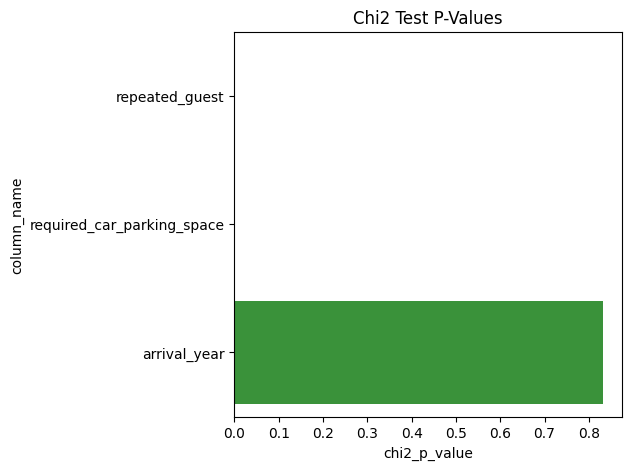

In [ ]:
#  plot chi2 test p-values
plt.figure(figsize=(5,5))
sns.barplot(x='chi2_p_value', y='column_name', data=chi2_test_p_values)
plt.title('Chi2 Test P-Values')
plt.show()

## **Kruskal-Wallis Test**
Consider to drop:
*   market segment type
*   arrival date



In [ ]:
# kriskal-wallis test

columns_to_drop = ['required_car_parking_space', 'arrival_year', 'repeated_guest', 'avg_price_per_room', 'booking_status']
variables = df.drop(columns_to_drop, axis=1)

kruskal_test_scores = pd.DataFrame(columns=['column_name', 'kruskal_score', 'kruskal_p_value'])
kruskal_test_scores['column_name'] = variables.columns

for var in variables:
    not_cancelled = df[df['booking_status'] == 0][var]
    cancelled = df[df['booking_status'] == 1][var]
    kruskal_test_scores_individual = kruskal(not_cancelled, cancelled)
    kruskal_score = kruskal_test_scores_individual.statistic
    kruskal_p_value = kruskal_test_scores_individual.pvalue
    kruskal_test_scores.loc[kruskal_test_scores['column_name'] == var, 'kruskal_score'] = kruskal_score
    kruskal_test_scores.loc[kruskal_test_scores['column_name'] == var, 'kruskal_p_value'] = kruskal_p_value

# Sort the DataFrame in descending order based on 'kruskal_score'
kruskal_test_scores.sort_values(by='kruskal_score', ascending=False, inplace=True)

# Reset the index after sorting
kruskal_test_scores.reset_index(drop=True, inplace=True)

print("Kruskal-Wallis Test Scores")
display(kruskal_test_scores[['column_name', 'kruskal_score']])

print("Kruskal-Wallis Test P-Values")
display(kruskal_test_scores[['column_name', 'kruskal_p_value']])

Kruskal-Wallis Test Scores


,column_name,kruskal_score
0,lead_time,3114.401257
1,no_of_special_requests,1138.403089
2,no_of_previous_bookings_not_canceled,193.334112
3,no_of_adults,176.101692
4,no_of_week_nights,117.796368
5,type_of_meal_plan,80.72925
6,no_of_previous_cancellations,54.179786
7,no_of_weekend_nights,49.815898
8,arrival_month,18.66069
9,no_of_children,18.010861


Kruskal-Wallis Test P-Values


,column_name,kruskal_p_value
0,lead_time,0.0
1,no_of_special_requests,0.0
2,no_of_previous_bookings_not_canceled,0.0
3,no_of_adults,0.0
4,no_of_week_nights,0.0
5,type_of_meal_plan,0.0
6,no_of_previous_cancellations,0.0
7,no_of_weekend_nights,0.0
8,arrival_month,0.000016
9,no_of_children,0.000022


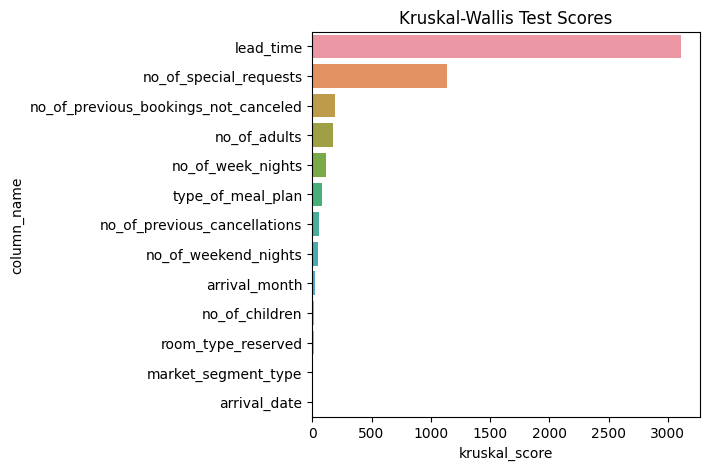

In [ ]:
# plot kruskal test scores
plt.figure(figsize=(5,5))
sns.barplot(x='kruskal_score', y='column_name', data=kruskal_test_scores.sort_values(by='kruskal_score', ascending=False))
plt.title('Kruskal-Wallis Test Scores')
plt.show()

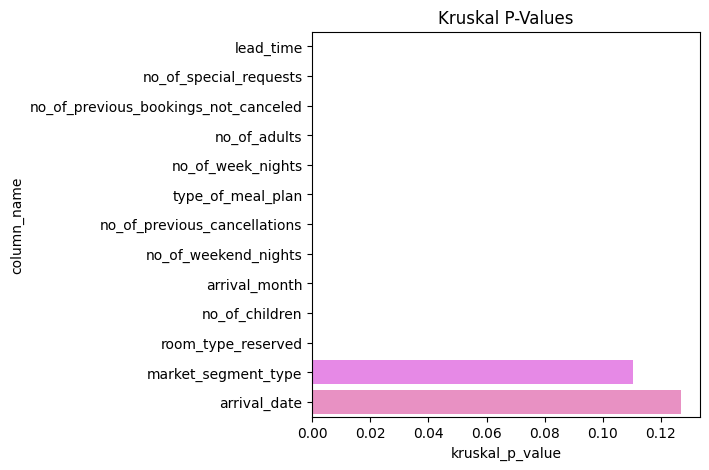

In [ ]:
#  plot kruskal p-values
plt.figure(figsize=(5,5))
sns.barplot(x='kruskal_p_value', y='column_name', data=kruskal_test_scores)
plt.title('Kruskal P-Values')
plt.show()

## **ANOVA Test**

In [ ]:
#  f_classif test

cont_input = df['avg_price_per_room']
cont_input_reshaped = cont_input.values.reshape(-1, 1)

f_classif_test = SelectKBest(score_func=f_classif, k='all')
f_classif_test.fit(cont_input_reshaped, df['booking_status'])

SelectKBest(k='all')

In [ ]:
# create dataframe for f_classif test scores
f_classif_test_scores = pd.DataFrame(f_classif_test.scores_, columns=['f_classif_score'])
f_classif_test_scores['column_name'] = cont_input.name

# swap column names and chi2 scores
f_classif_test_scores = f_classif_test_scores[['column_name', 'f_classif_score']]

# Sort the DataFrame in ascending order based on 'f_classif_score'
f_classif_test_scores.sort_values(by='f_classif_score', ascending=True, inplace=True)
f_classif_test_scores.reset_index(drop=True, inplace=True)

print("F_Classif Test Scores")
display(f_classif_test_scores)

# create dataframe for f_classif test p-values
f_classif_test_p_values = pd.DataFrame(f_classif_test.pvalues_, columns=['f_classif_p_value'])
f_classif_test_p_values['column_name'] = cont_input.name

# swap column names and chi2 scores
f_classif_test_p_values = f_classif_test_p_values[['column_name', 'f_classif_p_value']]

# Sort the DataFrame in ascending order based on 'f_classif_p_value'
f_classif_test_p_values.sort_values(by='f_classif_p_value', ascending=True, inplace=True)
f_classif_test_p_values.reset_index(drop=True, inplace=True)

print("F_Classif Test P-Values")
display(f_classif_test_p_values)

F_Classif Test Scores


,column_name,f_classif_score
0,avg_price_per_room,390.823385


F_Classif Test P-Values


,column_name,f_classif_p_value
0,avg_price_per_room,4.413540e-86


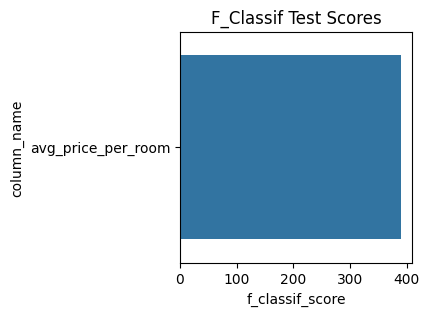

In [ ]:
# plot f_classif test scores
plt.figure(figsize=(3, 3))
sns.barplot(x='f_classif_score', y='column_name', data=f_classif_test_scores)
plt.title('F_Classif Test Scores')
plt.show()

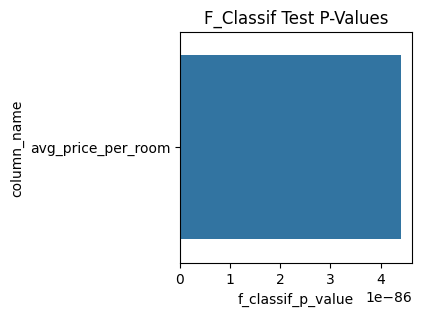

In [ ]:
# plot f_classif test p-value
plt.figure(figsize=(3, 3))
sns.barplot(x='f_classif_p_value', y='column_name', data=f_classif_test_p_values)
plt.title('F_Classif Test P-Values')
plt.show()

# **Data Preprocessing**

## **Drop Duplicates**

In [ ]:
df_rows = df.shape[0]
print("Total Rows for Original df:", df_rows)

# remove duplicate rows
df_drop_duplicates = df.drop_duplicates()

df_drop_duplicates_rows = df_drop_duplicates.shape[0]
print("Total Rows After Dropping Duplicates Rows:", df_drop_duplicates_rows)
df_drop_duplicates

Total Rows for Original df: 18137
Total Rows After Dropping Duplicates Rows: 14026


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18131,2,0,0,5,0,0,0,205,2018,7,26,1,0,0,0,70.03,1,1
18133,2,0,0,3,0,0,0,129,2018,8,10,1,0,0,0,88.01,1,0
18134,2,0,0,1,0,0,0,90,2018,7,13,1,0,0,0,105.30,0,1
18135,2,0,0,3,0,0,0,18,2018,11,10,1,1,0,1,123.33,1,0


## **Outliers Imputation**

In [ ]:
def replace_outliers_with_mode(df, column_name, outlier_threshold):
    # Calculate the mode of the column
    mode_value = df[column_name].mode().iloc[0]

    # Replace outlier values with the mode value
    df[column_name] = np.where(df[column_name] > outlier_threshold, mode_value, df[column_name])
    return df
print("Before Outliers Imputation: ")
print("Unique Value for no_of_weekend_nights: " ,df_drop_duplicates['no_of_weekend_nights'].unique())
print("Unique Value for no_of_week_nights: " ,df_drop_duplicates['no_of_week_nights'].unique())
print()
# Usage example:
df_drop_duplicates = replace_outliers_with_mode(df_drop_duplicates, 'no_of_weekend_nights', 2)
df_drop_duplicates = replace_outliers_with_mode(df_drop_duplicates, 'no_of_week_nights', 5)
print("After Outliers Imputation: ")
print("Unique Value for no_of_weekend_nights: " ,df_drop_duplicates['no_of_weekend_nights'].unique())
print("Unique Value for no_of_week_nights: " ,df_drop_duplicates['no_of_week_nights'].unique())

Before Outliers Imputation: 
Unique Value for no_of_weekend_nights:  [1 0 2 3 6 5 4 7]
Unique Value for no_of_week_nights:  [ 4  2  5  3  1  0 14  7 13  6  9  8 12 10 17 15 11 16]

After Outliers Imputation: 
Unique Value for no_of_weekend_nights:  [1 0 2]
Unique Value for no_of_week_nights:  [4 2 5 3 1 0]


## **Drop Unnecessary Columnns**

In [ ]:
final_df = df_drop_duplicates.drop(['arrival_year','market_segment_type','arrival_date'], axis=1)
final_df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_month', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

## **Encoding**

No need data encoding

In [ ]:
final_df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_month                             int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

## **Setting IV & TV**

In [ ]:
# Separate the input features (X) and the target variable (y)
X = final_df.drop(['booking_status'], axis=1)
y = final_df['booking_status']
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,4,0,0,0,118,12,0,0,0,110.80,2
1,2,1,0,2,0,0,0,17,4,0,0,0,145.00,0
2,1,0,1,5,0,0,0,349,10,0,0,0,96.67,0
3,1,0,2,4,0,0,0,69,6,0,0,0,120.00,0
4,2,0,0,4,1,0,0,11,1,0,0,0,69.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18131,2,0,0,5,0,0,0,205,7,0,0,0,70.03,1
18133,2,0,0,3,0,0,0,129,8,0,0,0,88.01,1
18134,2,0,0,1,0,0,0,90,7,0,0,0,105.30,0
18135,2,0,0,3,0,0,0,18,11,1,0,1,123.33,1


## **Normalization**

In [ ]:
selected_columns = ['no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'lead_time']

# Select the columns of interest
selected_data = X[selected_columns]

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the selected data using the StandardScaler
scaled_data = scaler.fit_transform(selected_data)

# Replace the original columns with the scaled values
X[selected_columns] = scaled_data

# print
X


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,4,0,0,0,0.266366,12,0,0,0.000000,0.205185,2
1,2,1,0,2,0,0,0,0.038375,4,0,0,0.000000,0.268519,0
2,1,0,1,5,0,0,0,0.787810,10,0,0,0.000000,0.179019,0
3,1,0,2,4,0,0,0,0.155756,6,0,0,0.000000,0.222222,0
4,2,0,0,4,1,0,0,0.024831,1,0,0,0.000000,0.128704,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18131,2,0,0,5,0,0,0,0.462754,7,0,0,0.000000,0.129685,1
18133,2,0,0,3,0,0,0,0.291196,8,0,0,0.000000,0.162981,1
18134,2,0,0,1,0,0,0,0.203160,7,0,0,0.000000,0.195000,0
18135,2,0,0,3,0,0,0,0.040632,11,1,0,0.017241,0.228389,1


## **Data Splitting**

In [ ]:
#split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## **Data Sampling**

In [ ]:
print("Before SMOTE oversampling: ", Counter(y_train))
print("Length of train set: ", X_train.shape, "y:", y_train.shape,'\n')
# Apply SMOTE only to the training set
sm = SMOTE()
X_smote_train, y_smote_train = sm.fit_resample(X_train, y_train)

print("After SMOTE oversampling: ", Counter(y_smote_train))
print("Length of train set: ", X_smote_train.shape, "y:", y_smote_train.shape)

Before SMOTE oversampling:  Counter({0: 7899, 1: 3321})
Length of train set:  (11220, 14) y: (11220,) 

After SMOTE oversampling:  Counter({0: 7899, 1: 7899})
Length of train set:  (15798, 14) y: (15798,)


# **Model Building**

In [ ]:
# load libraries
import tensorflow as tf

from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout

from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# import for ANN and DNN
from keras.layers import Activation

# import for CNN
from keras.layers import Flatten, Conv1D, MaxPooling1D, SpatialDropout1D
from keras.optimizers import Adam

# import for RNN
from keras.layers import SimpleRNN

## **1. ANN Model**

### **ANN with callbacks**

In [ ]:
# Function to build the CNN 1D model
def build_ann_model():

  ann_classifier = Sequential()

  # define the Input Layer (IL) and first Hidden Layer (HL)
  ann_classifier.add(Dense(units=350, kernel_initializer='random_normal', activation='relu', input_dim=14))
  ann_classifier.add(Dropout(0.2))  # preventing overfitting

  # define Hidden Layer (HL) with 150 units and Dropout of 0.2
  ann_classifier.add(Dense(units=150, kernel_initializer='random_normal', activation='relu'))
  ann_classifier.add(Dropout(0.2))

  # define the Output Layer (OL) with 1 unit and Sigmoid activation (for binary classification)
  ann_classifier.add(Dense(units=1, kernel_initializer='random_normal', activation='sigmoid'))
  ann_classifier.add(Dropout(0.2))  # preventing overfitting

  # compile the model
  ann_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return ann_classifier

ann_base_model = build_ann_model()

# print the summary of the model
ann_base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 350)               5250      
                                                                 
 dropout (Dropout)           (None, 350)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               52650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 58,051
Trainable params: 58,051
Non-traina

In [ ]:
# model checkpoint to save the best model during training
file = 'Best_ANN_Model.hdf5'
checkpoint = ModelCheckpoint(file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = ann_base_model.fit(X_smote_train, y_smote_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 100, callbacks = callbacks_list)

Epoch 1/100
489/494 [============================>.] - ETA: 0s - loss: 1.9485 - accuracy: 0.6717
Epoch 1: val_accuracy improved from -inf to 0.74341, saving model to Best_ANN_Model.hdf5
494/494 [==============================] - 4s 5ms/step - loss: 1.9532 - accuracy: 0.6717 - val_loss: 0.4963 - val_accuracy: 0.7434
Epoch 2/100
489/494 [============================>.] - ETA: 0s - loss: 2.0238 - accuracy: 0.7005
Epoch 2: val_accuracy improved from 0.74341 to 0.77441, saving model to Best_ANN_Model.hdf5
494/494 [==============================] - 2s 5ms/step - loss: 2.0254 - accuracy: 0.7007 - val_loss: 0.4557 - val_accuracy: 0.7744
Epoch 3/100
490/494 [============================>.] - ETA: 0s - loss: 2.0484 - accuracy: 0.7021
Epoch 3: val_accuracy did not improve from 0.77441
494/494 [==============================] - 3s 6ms/step - loss: 2.0462 - accuracy: 0.7021 - val_loss: 0.4799 - val_accuracy: 0.7655
Epoch 4/100
488/494 [============================>.] - ETA: 0s - loss: 1.9692 - accu

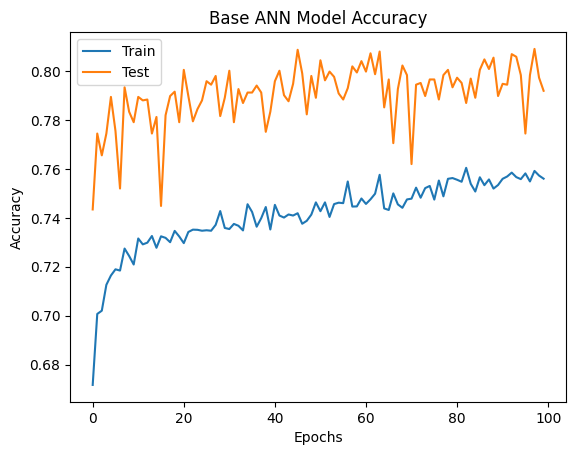

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Base ANN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [ ]:
ann_base_model.load_weights('Best_ANN_Model.hdf5')
y_pred = ann_base_model.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)

88/88 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
# Compute evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred) * 100
precision_score_test = precision_score(y_test, y_pred) * 100
recall_score_test = recall_score(y_test, y_pred) * 100
f1_score_test = f1_score(y_test, y_pred) * 100
roc_auc_score_test = roc_auc_score(y_test, y_pred) * 100

# Print the evaluation metrics
print("ANN Model Performance on Test Set:")
print("Accuracy: {:.2f}%".format(accuracy_test))
print("Precision: {:.2f}%".format(precision_score_test))
print("Recall: {:.2f}%".format(recall_score_test))
print("F1-score: {:.2f}%".format(f1_score_test))
print("ROC AUC Score: {:.2f}%".format(roc_auc_score_test))

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ANN Model Performance on Test Set:
Accuracy: 80.90%
Precision: 66.76%
Recall: 61.60%
F1-score: 64.08%
ROC AUC Score: 74.94%

Confusion Matrix:
[[1792  238]
 [ 298  478]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2030
           1       0.67      0.62      0.64       776

    accuracy                           0.81      2806
   macro avg       0.76      0.75      0.76      2806
weighted avg       0.80      0.81      0.81      2806



### **ANN with Grid Search**

In [ ]:
# Function to build the ANN model
def build_tune_ann_model(units, dropout, learning_rate):
    ann_classifier = Sequential()

    ann_classifier.add(Dense(units = 350, kernel_initializer='random_normal', activation='relu', input_dim = 14))
    ann_classifier.add(Dropout(dropout))

    ann_classifier.add(Dense(units=units, kernel_initializer='random_normal', activation='relu'))
    ann_classifier.add(Dropout(dropout))

    ann_classifier.add(Dense(units=1, kernel_initializer='random_normal', activation='sigmoid'))
    ann_classifier.add(Dropout(dropout))

    optimizer = Adam(learning_rate = learning_rate)
    ann_classifier.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])

    return ann_classifier


In [ ]:
# Create KerasClassifier wrapper
ann_model = KerasClassifier(build_fn = build_tune_ann_model, verbose=0)

# Define hyperparameters for grid search
param_grid = {
    'units': [300, 400, 500],
    'dropout': [0.2, 0.3, 0.4],
    'learning_rate': [1e-2, 1e-3]
}

grid_search = GridSearchCV(estimator = ann_model, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 1)

grid_search_result = grid_search.fit(X_smote_train,y_smote_train)

# Get best parameters and accuracy
best_params = grid_search_result.best_params_
best_accuracy = grid_search_result.best_score_

print('\nBest parameters: ', best_params)
print('\nBest accuracy: ', best_accuracy)

Fitting 10 folds for each of 18 candidates, totalling 180 fits

Best parameters:  {'dropout': 0.2, 'learning_rate': 0.001, 'units': 400}

Best accuracy:  0.7154445648193359


In [ ]:
best_tuned_ann_model = grid_search_result.best_estimator_

# define a new file for callback
file = 'Best_ANN_Model_GS.h5'
checkpoint = ModelCheckpoint(file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only = False)
callbacks_list = [checkpoint]

In [ ]:
# Fit the best model after tuning with callbacks
history = best_tuned_ann_model.fit(X_smote_train, y_smote_train, validation_data=(X_test, y_test), batch_size=32, epochs=100, callbacks=callbacks_list)


Epoch 1: val_accuracy improved from -inf to 0.77406, saving model to Best_ANN_Model_GS.h5

Epoch 2: val_accuracy did not improve from 0.77406

Epoch 3: val_accuracy did not improve from 0.77406

Epoch 4: val_accuracy did not improve from 0.77406

Epoch 5: val_accuracy improved from 0.77406 to 0.79401, saving model to Best_ANN_Model_GS.h5

Epoch 6: val_accuracy did not improve from 0.79401

Epoch 7: val_accuracy did not improve from 0.79401

Epoch 8: val_accuracy did not improve from 0.79401

Epoch 9: val_accuracy did not improve from 0.79401

Epoch 10: val_accuracy did not improve from 0.79401

Epoch 11: val_accuracy improved from 0.79401 to 0.79900, saving model to Best_ANN_Model_GS.h5

Epoch 12: val_accuracy did not improve from 0.79900

Epoch 13: val_accuracy did not improve from 0.79900

Epoch 14: val_accuracy did not improve from 0.79900

Epoch 15: val_accuracy did not improve from 0.79900

Epoch 16: val_accuracy did not improve from 0.79900

Epoch 17: val_accuracy did not improv

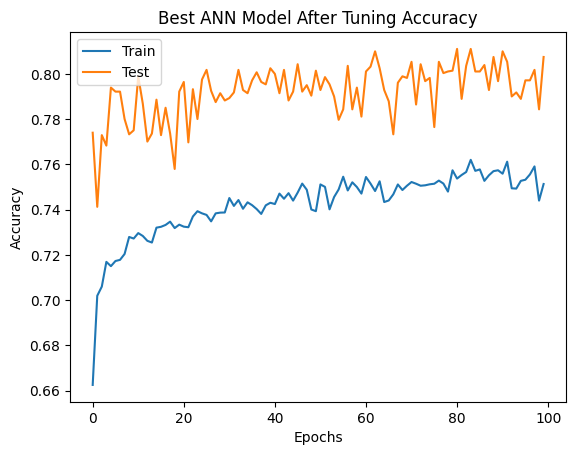

In [ ]:
# Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Best ANN Model After Tuning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
best_tuned_ann_model = load_model('Best_ANN_Model_GS.h5')
y_pred = best_tuned_ann_model.predict(X_test)
y_pred = (y_pred > 0.5)

# Compute evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred) * 100
precision_score_test = precision_score(y_test, y_pred) * 100
recall_score_test = recall_score(y_test, y_pred) * 100
f1_score_test = f1_score(y_test, y_pred) * 100
roc_auc_score_test = roc_auc_score(y_test, y_pred) * 100

# Print the evaluation metrics
print("\nANN Model Performance After Tuning on Test Set:")
print("Accuracy: {:.2f}%".format(accuracy_test))
print("Precision: {:.2f}%".format(precision_score_test))
print("Recall: {:.2f}%".format(recall_score_test))
print("F1-score: {:.2f}%".format(f1_score_test))
print("ROC AUC Score: {:.2f}%".format(roc_auc_score_test))

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

88/88 [==============================] - 0s 3ms/step

ANN Model Performance After Tuning on Test Set:
Accuracy: 81.11%
Precision: 65.73%
Recall: 66.24%
F1-score: 65.98%
ROC AUC Score: 76.52%

Confusion Matrix:
[[1762  268]
 [ 262  514]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2030
           1       0.66      0.66      0.66       776

    accuracy                           0.81      2806
   macro avg       0.76      0.77      0.76      2806
weighted avg       0.81      0.81      0.81      2806



## **2. DNN Model**

### **DNN with callbacks**

In [ ]:
# Function to build the DNN model
def build_dnn_model():

  model = Sequential()

  # define the Input Layer (IL)
  model.add(Dense(units=350, kernel_initializer='random_normal', activation='relu', input_dim=14))
  model.add(Dropout(0.2))

  # define first Hidden Layer (HL) with 300 units and Dropout of 0.2
  model.add(Dense(units=300, kernel_initializer='random_normal', activation='relu'))
  model.add(Dropout(0.2))

  # define second Hidden Layer (HL) with 250 units and Dropout of 0.2
  model.add(Dense(units=250, kernel_initializer='random_normal', activation='relu'))
  model.add(Dropout(0.2))

  # Define third Hidden Layer (HL) with 200 units and Dropout of 0.2
  model.add(Dense(units=200, kernel_initializer='random_normal', activation='relu'))
  model.add(Dropout(0.2))

  # define the Output Layer (OL) with 1 unit and Sigmoid activation (for binary classification)
  model.add(Dense(units=1, kernel_initializer='random_normal', activation='sigmoid'))
  model.add(Dropout(0.2))

  # compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

# Instantiate the model
dnn_base_model = build_dnn_model()

# Print the summary of the model
dnn_base_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 350)               5250      
                                                                 
 dropout_9 (Dropout)         (None, 350)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               105300    
                                                                 
 dropout_10 (Dropout)        (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 250)               75250     
                                                                 
 dropout_11 (Dropout)        (None, 250)               0         
                                                                 
 dense_12 (Dense)            (None, 200)              

In [ ]:
# model checkpoint to save the best model during training
file = 'Best_DNN_Model.hdf5'
checkpoint = ModelCheckpoint(file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = dnn_base_model.fit(X_smote_train, y_smote_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 100, callbacks = callbacks_list)

Epoch 1/100
488/494 [============================>.] - ETA: 0s - loss: 1.9640 - accuracy: 0.6657
Epoch 1: val_accuracy improved from -inf to 0.77370, saving model to Best_DNN_Model.hdf5
494/494 [==============================] - 7s 11ms/step - loss: 1.9665 - accuracy: 0.6661 - val_loss: 0.4646 - val_accuracy: 0.7737
Epoch 2/100
492/494 [============================>.] - ETA: 0s - loss: 1.9713 - accuracy: 0.7022
Epoch 2: val_accuracy did not improve from 0.77370
494/494 [==============================] - 5s 11ms/step - loss: 1.9687 - accuracy: 0.7025 - val_loss: 0.4527 - val_accuracy: 0.7719
Epoch 3/100
491/494 [============================>.] - ETA: 0s - loss: 1.9722 - accuracy: 0.7077
Epoch 3: val_accuracy improved from 0.77370 to 0.77477, saving model to Best_DNN_Model.hdf5
494/494 [==============================] - 6s 12ms/step - loss: 1.9700 - accuracy: 0.7081 - val_loss: 0.4603 - val_accuracy: 0.7748
Epoch 4/100
489/494 [============================>.] - ETA: 0s - loss: 1.9381 - a

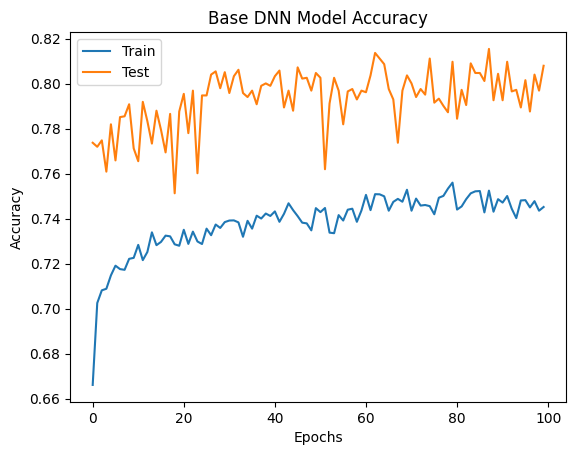

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Base DNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [ ]:
dnn_base_model.load_weights('Best_DNN_Model.hdf5')
y_pred = dnn_base_model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

88/88 [==============================] - 0s 3ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
# Compute evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred) * 100
precision_score_test = precision_score(y_test, y_pred) * 100
recall_score_test = recall_score(y_test, y_pred) * 100
f1_score_test = f1_score(y_test, y_pred) * 100
roc_auc_score_test = roc_auc_score(y_test, y_pred) * 100

# Print the evaluation metrics
print("DNN Model Performance on Test Set:")
print("Accuracy: {:.2f}%".format(accuracy_test))
print("Precision: {:.2f}%".format(precision_score_test))
print("Recall: {:.2f}%".format(recall_score_test))
print("F1-score: {:.2f}%".format(f1_score_test))
print("ROC AUC Score: {:.2f}%".format(roc_auc_score_test))

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

DNN Model Performance on Test Set:
Accuracy: 81.54%
Precision: 67.34%
Recall: 64.56%
F1-score: 65.92%
ROC AUC Score: 76.30%

Confusion Matrix:
[[1787  243]
 [ 275  501]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2030
           1       0.67      0.65      0.66       776

    accuracy                           0.82      2806
   macro avg       0.77      0.76      0.77      2806
weighted avg       0.81      0.82      0.81      2806



### **DNN with Grid Search**

In [ ]:
# Function to build the DNN model
def build_dnn_tuned_model(num_hidden_layers, units_per_layer, dropout_rate, learning_rate):

    model = Sequential()

    # Input layer with Dropout
    model.add(Dense(units=units_per_layer, kernel_initializer='random_normal', activation='relu', input_dim=14))
    model.add(Dropout(dropout_rate))

    # Additional Hidden Layers with Dropout
    for _ in range(num_hidden_layers - 1):
        model.add(Dense(units=units_per_layer, kernel_initializer='random_normal', activation='relu'))
        model.add(Dropout(dropout_rate))

    # Output Layer with Dropout
    model.add(Dense(units=1, kernel_initializer='random_normal', activation='sigmoid'))
    model.add(Dropout(dropout_rate))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Wrap the Keras model for use in scikit-learn
dnn_model = KerasClassifier(build_fn = build_dnn_tuned_model, verbose = 0)

param_grid = {
    'num_hidden_layers': [3, 4, 5],         # Number of hidden layers
    'units_per_layer': [250, 350, 500],       # Units per hidden layer
    'dropout_rate': [0.2, 0.3, 0.4],          # Dropout rates
    'learning_rate': [1e-3, 1e-4, 1e-5],    # Learning rates
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator = dnn_model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)

# Fit the model with grid search
grid_search_result = grid_search.fit(X_smote_train, y_smote_train)

# Get best parameters and accuracy
best_params = grid_search_result.best_params_
best_accuracy = grid_search_result.best_score_

print('\nBest parameters:', best_params)
print('\nBest accuracy:', best_accuracy)

Fitting 10 folds for each of 81 candidates, totalling 810 fits

Best parameters: {'dropout_rate': 0.2, 'learning_rate': 0.001, 'num_hidden_layers': 3, 'units_per_layer': 350}

Best accuracy: 0.7200834453105927


In [ ]:
best_tuned_dnn_model = grid_search_result.best_estimator_

# define a new file for callback
file = 'Best_DNN_Model_GS.h5'
checkpoint = ModelCheckpoint(file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)
callbacks_list = [checkpoint]

In [ ]:
history = best_tuned_dnn_model.fit(X_smote_train, y_smote_train, validation_data=(X_test, y_test), batch_size=32, epochs=100, callbacks=callbacks_list)



Epoch 1: val_accuracy improved from -inf to 0.76194, saving model to Best_DNN_Model_GS.h5

Epoch 2: val_accuracy did not improve from 0.76194

Epoch 3: val_accuracy improved from 0.76194 to 0.78689, saving model to Best_DNN_Model_GS.h5

Epoch 4: val_accuracy did not improve from 0.78689

Epoch 5: val_accuracy did not improve from 0.78689

Epoch 6: val_accuracy did not improve from 0.78689

Epoch 7: val_accuracy improved from 0.78689 to 0.79473, saving model to Best_DNN_Model_GS.h5

Epoch 8: val_accuracy did not improve from 0.79473

Epoch 9: val_accuracy did not improve from 0.79473

Epoch 10: val_accuracy did not improve from 0.79473

Epoch 11: val_accuracy did not improve from 0.79473

Epoch 12: val_accuracy did not improve from 0.79473

Epoch 13: val_accuracy did not improve from 0.79473

Epoch 14: val_accuracy did not improve from 0.79473

Epoch 15: val_accuracy did not improve from 0.79473

Epoch 16: val_accuracy improved from 0.79473 to 0.79900, saving model to Best_DNN_Model_GS

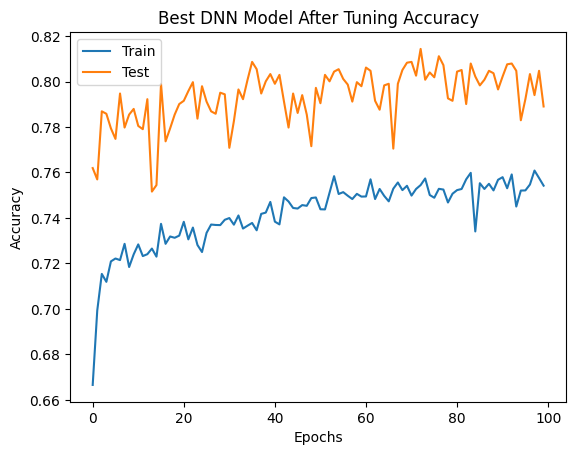

In [ ]:
# Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Best DNN Model After Tuning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Compute evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred) * 100
precision_score_test = precision_score(y_test, y_pred) * 100
recall_score_test = recall_score(y_test, y_pred) * 100
f1_score_test = f1_score(y_test, y_pred) * 100
roc_auc_score_test = roc_auc_score(y_test, y_pred) * 100

# Print the evaluation metrics
print("\nDNN Model Performance After Tuning on Test Set:")
print("Accuracy: {:.2f}%".format(accuracy_test))
print("Precision: {:.2f}%".format(precision_score_test))
print("Recall: {:.2f}%".format(recall_score_test))
print("F1-score: {:.2f}%".format(f1_score_test))
print("ROC AUC Score: {:.2f}%".format(roc_auc_score_test))

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

88/88 [==============================] - 0s 2ms/step

DNN Model Performance After Tuning on Test Set:
Accuracy: 81.43%
Precision: 68.29%
Recall: 61.34%
F1-score: 64.63%
ROC AUC Score: 75.23%

Confusion Matrix:
[[1809  221]
 [ 300  476]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2030
           1       0.68      0.61      0.65       776

    accuracy                           0.81      2806
   macro avg       0.77      0.75      0.76      2806
weighted avg       0.81      0.81      0.81      2806



## **3. CNN Model**

#### **Reshaping training data for CNN**

In [ ]:
# Convert DataFrame to NumPy array, as reshape() is only for NumPy array
X_smote_train_array = X_smote_train.values
X_test_array = X_test.values

# Reshape the dataset to be suitable for the CNN 1D model
X_smote_train_reshaped = X_smote_train_array.reshape(X_smote_train_array.shape[0], X_smote_train_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# Before reshaping:
print("Before reshaping: ")
print("Shape of X_smote_train:", X_smote_train.shape)
print("Shape of X_test:", X_test.shape)
print()

# After reshaping:
print("Before reshaping: ")
print("Shape of X_smote_train:", X_smote_train_reshaped.shape)
print("Shape of X_test:", X_test_reshaped.shape)
print()


Before reshaping: 
Shape of X_smote_train: (15798, 14)
Shape of X_test: (2806, 14)

Before reshaping: 
Shape of X_smote_train: (15798, 14, 1)
Shape of X_test: (2806, 14, 1)



#### **CNN with callbacks**

In [ ]:
# Function to build the CNN 1D model
def build_cnn_model():

  # Input layer and CNN initialization
  model_cnn = Sequential()
  model_cnn.add(Conv1D(filters = 50, kernel_size = 2, activation = "relu", input_shape = (14, 1)))

  # Pooling layer
  model_cnn.add(MaxPooling1D(pool_size = 2))

  # Flatten layer
  model_cnn.add(Flatten())

  # Fully connected layer
  model_cnn.add(Dense(50, activation = "relu"))

  # Output layer
  model_cnn.add(Dense(1, activation = "sigmoid"))

  # Compile the model
  model_cnn.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
  return model_cnn

cnn_base_model = build_cnn_model()

cnn_base_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 13, 50)            150       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 6, 50)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                15050     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 15,251
Trainable params: 15,251
Non-trainable params: 0
__________________________________________________

In [ ]:
# model checkpoint to save the best model during training
file = 'Best_CNN_Model.hdf5'
checkpoint = ModelCheckpoint(file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# Fit and train the base CNN model
history = cnn_base_model.fit(X_smote_train_reshaped, y_smote_train,
                             validation_data = (X_test_reshaped, y_test),
                             epochs = 100, batch_size = 32, callbacks = callbacks_list)

Epoch 1/100
492/494 [============================>.] - ETA: 0s - loss: 0.6482 - accuracy: 0.6178
Epoch 1: val_accuracy improved from -inf to 0.70634, saving model to Best_CNN_Model.hdf5
494/494 [==============================] - 4s 6ms/step - loss: 0.6480 - accuracy: 0.6181 - val_loss: 0.5800 - val_accuracy: 0.7063
Epoch 2/100
488/494 [============================>.] - ETA: 0s - loss: 0.5869 - accuracy: 0.6810
Epoch 2: val_accuracy did not improve from 0.70634
494/494 [==============================] - 2s 5ms/step - loss: 0.5869 - accuracy: 0.6809 - val_loss: 0.6017 - val_accuracy: 0.6907
Epoch 3/100
492/494 [============================>.] - ETA: 0s - loss: 0.5748 - accuracy: 0.6888
Epoch 3: val_accuracy improved from 0.70634 to 0.72488, saving model to Best_CNN_Model.hdf5
494/494 [==============================] - 2s 4ms/step - loss: 0.5749 - accuracy: 0.6888 - val_loss: 0.5372 - val_accuracy: 0.7249
Epoch 4/100
484/494 [============================>.] - ETA: 0s - loss: 0.5716 - accu

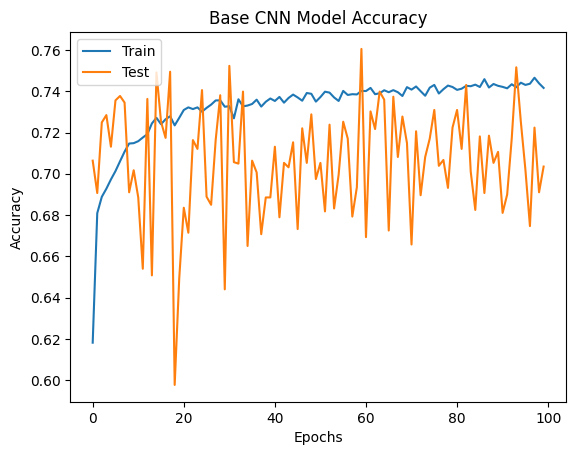

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Base CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [ ]:
cnn_base_model.load_weights('Best_CNN_Model.hdf5')
y_pred = cnn_base_model.predict(X_test_reshaped)
y_pred = (y_pred > 0.5)
print(y_pred)

88/88 [==============================] - 0s 2ms/step
[[False]
 [ True]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
# Compute evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred) * 100
precision_score_test = precision_score(y_test, y_pred) * 100
recall_score_test = recall_score(y_test, y_pred) * 100
f1_score_test = f1_score(y_test, y_pred) * 100
roc_auc_score_test = roc_auc_score(y_test, y_pred) * 100

# Print the evaluation metrics
print("CNN Base Model Performance on Test Set:")
print("Accuracy: {:.2f}%".format(accuracy_test))
print("Precision: {:.2f}%".format(precision_score_test))
print("Recall: {:.2f}%".format(recall_score_test))
print("F1-score: {:.2f}%".format(f1_score_test))
print("ROC AUC Score: {:.2f}%".format(roc_auc_score_test))

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

CNN Base Model Performance on Test Set:
Accuracy: 76.05%
Precision: 56.91%
Recall: 55.15%
F1-score: 56.02%
ROC AUC Score: 69.60%

Confusion Matrix:
[[1706  324]
 [ 348  428]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2030
           1       0.57      0.55      0.56       776

    accuracy                           0.76      2806
   macro avg       0.70      0.70      0.70      2806
weighted avg       0.76      0.76      0.76      2806



#### **CNN with Grid Search**

In [ ]:
# Import Dropout and Adam for tuning purpose
from keras.layers import Dropout
from keras.optimizers import Adam

# This function is to initialize a model for Tuning
def build_cnn_tune_model(filters, kernel_size, dense_units, dropout_rate, learning_rate):

    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=filters, kernel_size=kernel_size, activation="relu", input_shape=(14, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=dense_units, activation="relu"))
    model_cnn.add(Dropout(rate=dropout_rate))
    model_cnn.add(Dense(units=1, activation="sigmoid"))

    optimizer = Adam(learning_rate=learning_rate)
    model_cnn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model_cnn

In [ ]:
# Wrap the Keras model for use in scikit-learn
cnn_model = KerasClassifier(build_fn = build_cnn_tune_model, verbose=0)

param_grid = {
    'filters': [32, 64, 128],          # Number of filters in the Conv1D layer
    'kernel_size': [2, 3, 4],          # Kernel size in the Conv1D layer
    'dense_units': [32, 64, 128],      # Number of units in the Dense layer
    'dropout_rate': [0.2, 0.3],   # Dropout rates
    'learning_rate': [1e-2, 1e-3],  # Learning rates
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator = cnn_model, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 1)

# Fit the model with grid search
grid_search_result = grid_search.fit(X_smote_train_reshaped, y_smote_train)

# Get best parameters and accuracy
best_params = grid_search_result.best_params_
best_accuracy = grid_search_result.best_score_

print('\nBest parameters:', best_params)
print('\nBest accuracy:', best_accuracy)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits

Best parameters: {'dense_units': 32, 'dropout_rate': 0.3, 'filters': 32, 'kernel_size': 3, 'learning_rate': 0.01}

Best accuracy: 0.751502948999405


In [ ]:
best_tuned_cnn_model = grid_search_result.best_estimator_

# define a new file for callback
file = 'Best_CNN_Model_GS.h5'
checkpoint = ModelCheckpoint(file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)
callbacks_list = [checkpoint]

In [ ]:
# Fit the best model after tuning with callbacks
history = best_tuned_cnn_model.fit(X_smote_train_reshaped, y_smote_train,
                                   validation_data = (X_test_reshaped, y_test),
                                   epochs = 100, batch_size = 32, callbacks = callbacks_list)


Epoch 1: val_accuracy improved from -inf to 0.70314, saving model to Best_CNN_Model_GS.h5

Epoch 2: val_accuracy improved from 0.70314 to 0.71347, saving model to Best_CNN_Model_GS.h5

Epoch 3: val_accuracy did not improve from 0.71347

Epoch 4: val_accuracy improved from 0.71347 to 0.73984, saving model to Best_CNN_Model_GS.h5

Epoch 5: val_accuracy did not improve from 0.73984

Epoch 6: val_accuracy did not improve from 0.73984

Epoch 7: val_accuracy did not improve from 0.73984

Epoch 8: val_accuracy did not improve from 0.73984

Epoch 9: val_accuracy did not improve from 0.73984

Epoch 10: val_accuracy improved from 0.73984 to 0.74661, saving model to Best_CNN_Model_GS.h5

Epoch 11: val_accuracy did not improve from 0.74661

Epoch 12: val_accuracy improved from 0.74661 to 0.75125, saving model to Best_CNN_Model_GS.h5

Epoch 13: val_accuracy did not improve from 0.75125

Epoch 14: val_accuracy did not improve from 0.75125

Epoch 15: val_accuracy did not improve from 0.75125

Epoch 

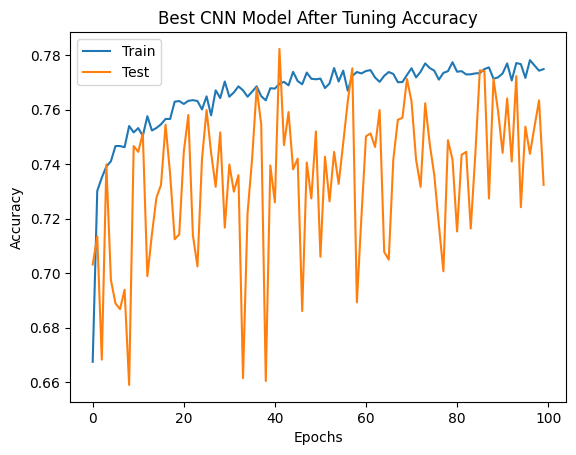

In [ ]:
# Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Best CNN Model After Tuning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Predict on test data using the best model found by GridSearchCV

from keras.models import load_model

#load the entire model from the callback file
best_tuned_cnn_model = load_model('Best_CNN_Model_GS.h5')
y_pred = best_tuned_cnn_model.predict(X_test_reshaped)
y_pred = (y_pred > 0.5)

# Compute evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred) * 100
precision_score_test = precision_score(y_test, y_pred) * 100
recall_score_test = recall_score(y_test, y_pred) * 100
f1_score_test = f1_score(y_test, y_pred) * 100
roc_auc_score_test = roc_auc_score(y_test, y_pred) * 100

# Print the evaluation metrics
print("\nCNN Model Performance After Tuning on Test Set:")
print("Accuracy: {:.2f}%".format(accuracy_test))
print("Precision: {:.2f}%".format(precision_score_test))
print("Recall: {:.2f}%".format(recall_score_test))
print("F1-score: {:.2f}%".format(f1_score_test))
print("ROC AUC Score: {:.2f}%".format(roc_auc_score_test))

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

88/88 [==============================] - 0s 2ms/step

CNN Model Performance After Tuning on Test Set:
Accuracy: 78.23%
Precision: 59.39%
Recall: 67.27%
F1-score: 63.08%
ROC AUC Score: 74.84%

Confusion Matrix:
[[1673  357]
 [ 254  522]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      2030
           1       0.59      0.67      0.63       776

    accuracy                           0.78      2806
   macro avg       0.73      0.75      0.74      2806
weighted avg       0.79      0.78      0.79      2806



## **4. RNN Model**

#### **Reshaping training data for RNN**

In [ ]:
# Reshape it to 3D format with a single timestep
# Train set
X_smote_train_array = X_smote_train.values
X_smote_train_3d = X_smote_train_array.reshape(-1, 1, X_smote_train_array.shape[1])

# Test set
X_test_array = X_test.values
X_test_3d = X_test_array.reshape(-1, 1, X_test_array.shape[1])

# Before reshaping:
print("Before reshaping: ")
print("Shape of X_smote_train:", X_smote_train.shape)
print("Shape of X_test:", X_test.shape)
print()

# After reshaping:
print("Before reshaping: ")
print("Shape of X_smote_train:", X_smote_train_3d.shape)
print("Shape of X_test:", X_test_3d.shape)
print()


Before reshaping: 
Shape of X_smote_train: (15798, 14)
Shape of X_test: (2806, 14)

Before reshaping: 
Shape of X_smote_train: (15798, 1, 14)
Shape of X_test: (2806, 1, 14)



#### **RNN with callbacks**

In [ ]:
# Function to build the RNN model
def build_rnn_model():

  rnn_model = Sequential()

  # SimpleRNN layer with 64 neurons and 'relu' activation function
  # The input shape is (number_of_time_steps, number_of_features_per_time_step)
  rnn_model.add(SimpleRNN(64, activation='relu', input_shape=(X_smote_train_3d.shape[1], X_smote_train_3d.shape[2])))

  # Dense layer with 1 neuron and 'sigmoid' activation function for binary classification
  rnn_model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

    # compile the model
  rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return rnn_model

# Instantiate the model
rnn_classifier = build_rnn_model()

# Print the summary of the model
rnn_classifier.summary()

# model checkpoint to save the best model during training
file = 'Base_RNN_Model.hdf5'
checkpoint = ModelCheckpoint(file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                5056      
                                                                 
 dense_34 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the RNN model
base_history = rnn_classifier.fit(X_smote_train_3d, y_smote_train,  validation_data = (X_test_3d, y_test),  epochs=100, batch_size=32, callbacks=callbacks_list)

Epoch 1/100
480/494 [============================>.] - ETA: 0s - loss: 0.5876 - accuracy: 0.6891
Epoch 1: val_accuracy improved from -inf to 0.69280, saving model to Base_RNN_Model.hdf5
494/494 [==============================] - 3s 4ms/step - loss: 0.5865 - accuracy: 0.6895 - val_loss: 0.5525 - val_accuracy: 0.6928
Epoch 2/100
486/494 [============================>.] - ETA: 0s - loss: 0.5195 - accuracy: 0.7436
Epoch 2: val_accuracy improved from 0.69280 to 0.71775, saving model to Base_RNN_Model.hdf5
494/494 [==============================] - 2s 4ms/step - loss: 0.5187 - accuracy: 0.7450 - val_loss: 0.5387 - val_accuracy: 0.7177
Epoch 3/100
487/494 [============================>.] - ETA: 0s - loss: 0.5021 - accuracy: 0.7602
Epoch 3: val_accuracy improved from 0.71775 to 0.72096, saving model to Base_RNN_Model.hdf5
494/494 [==============================] - 2s 4ms/step - loss: 0.5022 - accuracy: 0.7607 - val_loss: 0.5529 - val_accuracy: 0.7210
Epoch 4/100
479/494 [======================

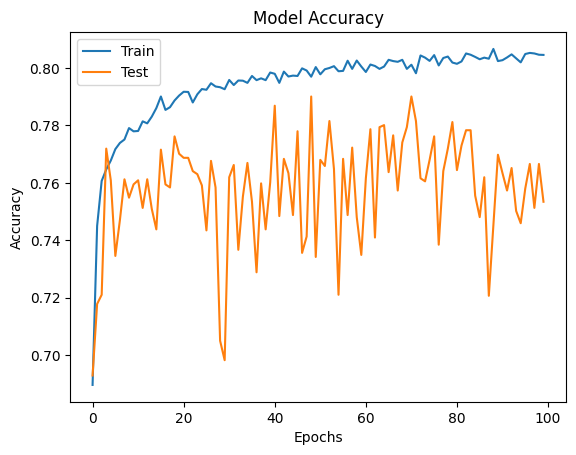

In [ ]:
import matplotlib.pyplot as plt
plt.plot(base_history.history['accuracy'])
plt.plot(base_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [ ]:
# Predict using the RNN model
rnn_classifier.load_weights('Base_RNN_Model.hdf5')
y_pred = rnn_classifier.predict(X_test_3d)
y_pred = (y_pred > 0.5)
print(y_pred)

88/88 [==============================] - 0s 2ms/step
[[False]
 [ True]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
# Evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred) * 100
precision_score_test = precision_score(y_test, y_pred) * 100
recall_score_test = recall_score(y_test, y_pred) * 100
f1_score_test = f1_score(y_test, y_pred) * 100
roc_auc_score_test = roc_auc_score(y_test, y_pred) * 100

# Print the evaluation metrics
print("RNN Model Performance on Test Set:")
print("Accuracy: {:.2f}%".format(accuracy_test))
print("Precision: {:.2f}%".format(precision_score_test))
print("Recall: {:.2f}%".format(recall_score_test))
print("F1-score: {:.2f}%".format(f1_score_test))
print("ROC AUC Score: {:.2f}%".format(roc_auc_score_test))

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

RNN Model Performance on Test Set:
Accuracy: 79.01%
Precision: 61.07%
Recall: 66.49%
F1-score: 63.66%
ROC AUC Score: 75.14%

Confusion Matrix:
[[1701  329]
 [ 260  516]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2030
           1       0.61      0.66      0.64       776

    accuracy                           0.79      2806
   macro avg       0.74      0.75      0.74      2806
weighted avg       0.80      0.79      0.79      2806



#### **RNN with Grid Search**

In [ ]:
def build_rnn_tune_model(hidden_units, dropout_rate):
    rnn_model = Sequential()

    # SimpleRNN layer with 'hidden_units' neurons and 'relu' activation function
    # The input shape is (number_of_time_steps, number_of_features_per_time_step)
    rnn_model.add(SimpleRNN(hidden_units, dropout= dropout_rate,  activation='relu', input_shape=(X_smote_train_3d.shape[1], X_smote_train_3d.shape[2])))

    # Dense layer with 1 neuron and 'sigmoid' activation function for binary classification
    rnn_model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

    # Compile the model
    rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return rnn_model

In [ ]:
# Wrap the Keras model for use in scikit-learn
rnn_model = KerasClassifier(build_fn = build_rnn_tune_model, verbose=0)

# Define hyperparameters to search over, including the new parameters
param_grid = {
    'hidden_units': [32, 64, 128],
    'dropout_rate': [0.2, 0.5]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rnn_model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)

# Fit the model with grid search
grid_search_result = grid_search.fit(X_smote_train_3d, y_smote_train)

# Get best parameters and accuracy
best_params = grid_search_result.best_params_
best_accuracy = grid_search_result.best_score_

print('\nBest parameters:', best_params)
print('\nBest accuracy:', best_accuracy)

Fitting 10 folds for each of 6 candidates, totalling 60 fits

Best parameters: {'dropout_rate': 0.2, 'hidden_units': 32}

Best accuracy: 0.6787042379379272


In [ ]:
best_tuned_rnn_model = grid_search_result.best_estimator_

# define a new file for callback
file = 'Best_RNN_Model_GS.h5'
checkpoint = ModelCheckpoint(file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only = False)
callbacks_list = [checkpoint]

# Fit the best model after tuning with callbacks
history = best_tuned_rnn_model.fit(X_smote_train_3d, y_smote_train, validation_data = (X_test_3d, y_test), epochs = 100, batch_size = 32, callbacks = callbacks_list)


Epoch 1: val_accuracy improved from -inf to 0.66180, saving model to Best_RNN_Model_GS.h5

Epoch 2: val_accuracy improved from 0.66180 to 0.66465, saving model to Best_RNN_Model_GS.h5

Epoch 3: val_accuracy improved from 0.66465 to 0.70349, saving model to Best_RNN_Model_GS.h5

Epoch 4: val_accuracy improved from 0.70349 to 0.74483, saving model to Best_RNN_Model_GS.h5

Epoch 5: val_accuracy did not improve from 0.74483

Epoch 6: val_accuracy did not improve from 0.74483

Epoch 7: val_accuracy did not improve from 0.74483

Epoch 8: val_accuracy did not improve from 0.74483

Epoch 9: val_accuracy did not improve from 0.74483

Epoch 10: val_accuracy improved from 0.74483 to 0.74590, saving model to Best_RNN_Model_GS.h5

Epoch 11: val_accuracy did not improve from 0.74590

Epoch 12: val_accuracy improved from 0.74590 to 0.76764, saving model to Best_RNN_Model_GS.h5

Epoch 13: val_accuracy did not improve from 0.76764

Epoch 14: val_accuracy did not improve from 0.76764

Epoch 15: val_acc

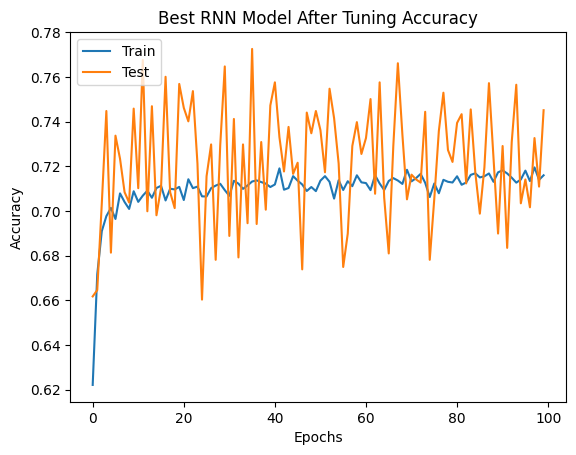

In [ ]:
# Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Best RNN Model After Tuning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Predict on test data using the best model found by GridSearchCV
best_tuned_rnn_model = load_model('Best_RNN_Model_GS.h5')

y_pred = best_tuned_rnn_model.predict(X_test_3d)
y_pred = (y_pred > 0.5)

# Compute evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred) * 100
precision_score_test = precision_score(y_test, y_pred) * 100
recall_score_test = recall_score(y_test, y_pred) * 100
f1_score_test = f1_score(y_test, y_pred) * 100
roc_auc_score_test = roc_auc_score(y_test, y_pred) * 100

# Print the evaluation metrics
print("\nRNN Model Performance After Tuning on Test Set:")
print("Accuracy: {:.2f}%".format(accuracy_test))
print("Precision: {:.2f}%".format(precision_score_test))
print("Recall: {:.2f}%".format(recall_score_test))
print("F1-score: {:.2f}%".format(f1_score_test))
print("ROC AUC Score: {:.2f}%".format(roc_auc_score_test))

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

88/88 [==============================] - 0s 2ms/step

RNN Model Performance After Tuning on Test Set:
Accuracy: 77.26%
Precision: 57.55%
Recall: 67.78%
F1-score: 62.25%
ROC AUC Score: 74.34%

Confusion Matrix:
[[1642  388]
 [ 250  526]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      2030
           1       0.58      0.68      0.62       776

    accuracy                           0.77      2806
   macro avg       0.72      0.74      0.73      2806
weighted avg       0.79      0.77      0.78      2806



# **Feature Importance of the Top 2 Best Performing model**

In [ ]:
# Store the feature names in a list
feature_names = X.columns.to_list()
print("Input features: ", feature_names)

Input features:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [ ]:
def plot_feature_importance(feature_names, model, title):

    input_to_hidden_weights = model.layers[0].get_weights()[0]
    feature_importance = np.abs(input_to_hidden_weights).sum(axis=1)

    # Create a DataFrame with feature names and importance scores
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

    # Sort the DataFrame by Importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    # Plot feature importance with annotations
    plt.figure(figsize=(12, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

    # Add annotations to the bars
    for index, value in enumerate(feature_importance_df['Importance']):
        plt.text(value, index, f'{value:.3f}', ha='left', va='center')

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features (IV)')
    plt.title(title)
    plt.show()

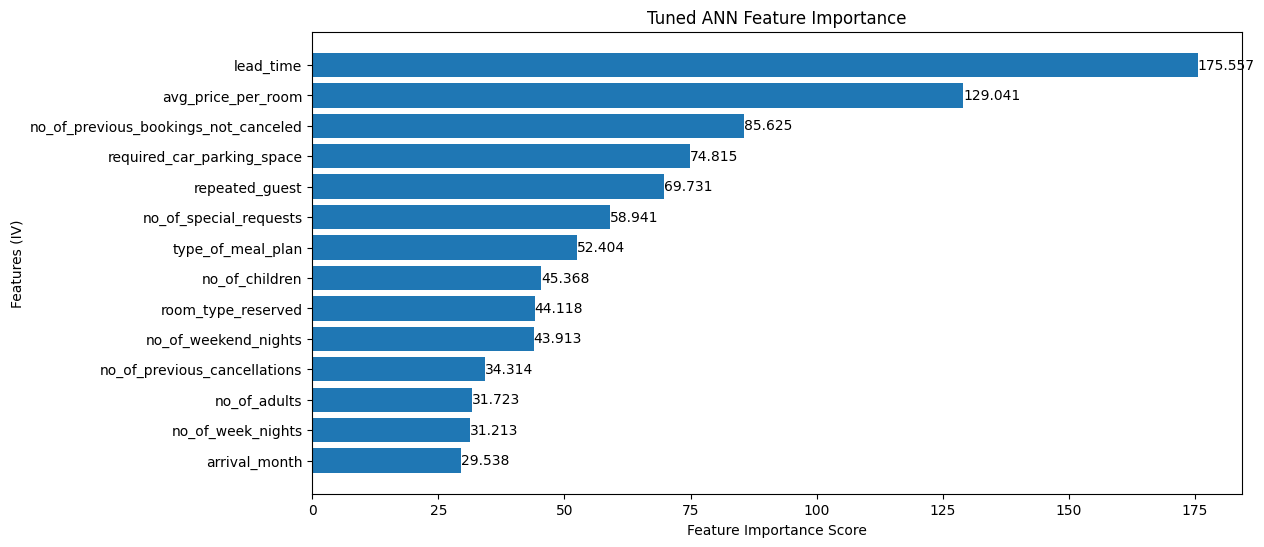

In [ ]:
# Call the function with the correct model
plot_feature_importance(feature_names, best_tuned_ann_model, 'Tuned ANN Feature Importance')

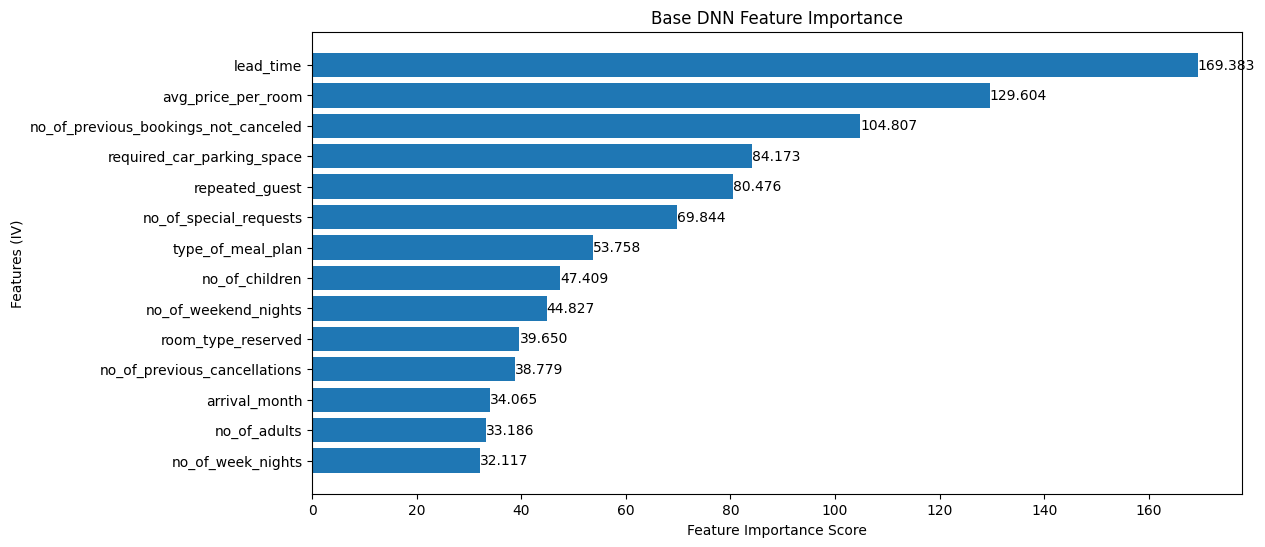

In [ ]:
plot_feature_importance(feature_names, dnn_base_model, 'Base DNN Feature Importance')